Jackson, Darshil, Talia, and Ahmad World Happiness 2021 Data stuff!

3. World Happiness Report 2021

● What does happiness index look like across the
world?
\
● What affects happiness index? \
● Can you group countries based on features such
as economic production, social support, life
expectancy etc? \
● What impact did COVID-19 have on this index? \
\
More info here: https://worldhappiness.report/ed/2021/



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from ipywidgets import interact
import ipywidgets as widgets



#This is so that you don't see a bunch of code 'warnings' (things that you could change but don't have to right now)
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns

#This makes all of our graphs show up in our notebook when they're made
%matplotlib inline

In [67]:
wh2021 = pd.read_csv('data/world-happiness-report-2021.csv')
wh2021.sample(10)


,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
128,Sri Lanka,South Asia,4.325,0.066,4.454,4.196,9.470,0.827,67.299,0.841,0.079,0.863,2.43,0.990,0.820,0.593,0.559,0.239,0.049,1.075
49,Mauritius,Sub-Saharan Africa,6.049,0.059,6.165,5.933,10.008,0.905,66.701,0.867,-0.054,0.789,2.43,1.178,0.996,0.574,0.590,0.153,0.096,2.462
142,Haiti,Latin America and Caribbean,3.615,0.173,3.953,3.276,7.477,0.540,55.700,0.593,0.422,0.721,2.43,0.294,0.173,0.227,0.257,0.463,0.139,2.060
66,Kyrgyzstan,Commonwealth of Independent States,5.744,0.046,5.834,5.653,8.538,0.893,64.401,0.935,0.119,0.908,2.43,0.665,0.971,0.501,0.673,0.266,0.020,2.648
61,South Korea,East Asia,5.845,0.042,5.928,5.763,10.651,0.799,73.900,0.672,-0.083,0.727,2.43,1.403,0.758,0.801,0.353,0.134,0.135,2.262
60,Philippines,Southeast Asia,5.880,0.052,5.982,5.778,9.076,0.830,62.000,0.917,-0.097,0.742,2.43,0.853,0.828,0.426,0.651,0.125,0.126,2.872
17,Czech Republic,Central and Eastern Europe,6.965,0.049,7.062,6.868,10.556,0.947,70.807,0.858,-0.208,0.868,2.43,1.370,1.090,0.703,0.580,0.052,0.046,3.124
88,Maldives,South Asia,5.198,0.072,5.339,5.057,9.826,0.913,70.600,0.854,0.024,0.825,2.43,1.115,1.015,0.697,0.575,0.204,0.073,1.520
43,Poland,Central and Eastern Europe,6.166,0.040,6.245,6.087,10.382,0.898,69.702,0.841,-0.165,0.735,2.43,1.309,0.982,0.668,0.558,0.080,0.130,2.438
57,Portugal,Western Europe,5.929,0.055,6.037,5.821,10.421,0.879,72.600,0.892,-0.244,0.887,2.43,1.323,0.939,0.760,0.621,0.029,0.033,2.225


In [5]:
wh = pd.read_csv('data/world-happiness-report.csv')
wh.sample(10)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
716,Hungary,2013,4.914,10.140,0.877,66.08,0.674,-0.113,0.912,0.706,0.307
109,Bahrain,2011,4.824,10.696,0.908,66.58,0.870,-0.051,0.583,0.544,0.514
1750,Tunisia,2018,4.741,9.284,0.733,66.90,0.650,-0.191,0.840,0.592,0.365
1780,Uganda,2008,4.569,7.471,0.813,48.44,0.578,-0.055,0.848,0.641,0.240
765,Iran,2012,4.609,9.458,0.600,64.38,0.764,NaN,0.678,0.609,0.525
631,Ghana,2016,4.514,8.460,0.647,56.40,0.751,0.090,0.894,0.668,0.305
163,Benin,2006,3.330,7.866,0.445,50.10,0.580,-0.011,0.790,0.587,0.309
1631,Sudan,2012,4.550,8.296,0.813,54.56,0.412,-0.056,0.734,0.576,0.242
106,Azerbaijan,2019,5.173,9.575,0.887,65.80,0.854,-0.214,0.457,0.643,0.164
1716,Thailand,2010,6.217,9.576,0.898,65.50,0.860,0.536,0.917,0.901,0.182


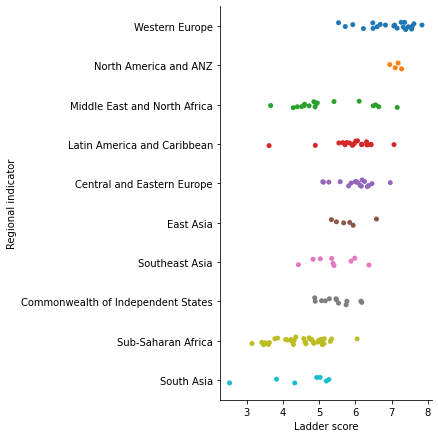

In [69]:
happy_by_country = sns.catplot(
    data=wh2021,
    y='Regional indicator', x="Ladder score",
    ci=None, orient='h', height=6
)

In [103]:
wh['Generosity'] = wh['Generosity'].fillna(wh['Generosity'].mode()[0])
from sklearn.preprocessing import MinMaxScaler

In [7]:
#Jackson's Section Start

In [8]:
wh2021_j = wh2021.drop(columns=['Regional indicator', 'Standard error of ladder score', 'upperwhisker', 'lowerwhisker', 'Ladder score in Dystopia', 'Explained by: Log GDP per capita', 'Explained by: Social support', 'Explained by: Healthy life expectancy', 'Explained by: Freedom to make life choices', 'Explained by: Generosity', 'Explained by: Perceptions of corruption', 'Dystopia + residual'])
wh2021_j['year'] = 2021
wh2021_j = wh2021_j[wh2021_j['Country name'].isin(wh[wh['year']==2020]['Country name'].unique())]
wh2021_j = wh2021_j.rename(columns={'Ladder score': 'Life Ladder', 'Logged GDP per capita': 'Log GDP per capita', 'Healthy life expectancy': 'Healthy life expectancy at birth'})
wh_j = wh.drop(columns=['Positive affect', 'Negative affect'])
wh_j = wh_j[wh_j['Country name'].isin(wh2021_j['Country name'].unique())]
wh_j=wh_j.append(wh2021_j) #Add a 2021 statistic for all the countries to help get data on pre-rona v post-rona

In [9]:
wh_j[wh_j['Country name'] == 'United States']

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
1836,United States,2006,7.182,10.924,0.965,68.06,0.911,NaN,0.600
1837,United States,2007,7.513,10.933,NaN,68.22,0.872,0.197,0.633
1838,United States,2008,7.280,10.922,0.953,68.38,0.878,0.255,0.668
1839,United States,2009,7.158,10.888,0.912,68.54,0.831,0.201,0.665
1840,United States,2010,7.164,10.905,0.926,68.70,0.828,0.244,0.690
1841,United States,2011,7.115,10.913,0.922,68.68,0.863,0.161,0.697
1842,United States,2012,7.026,10.928,0.903,68.66,0.823,0.215,0.710
1843,United States,2013,7.249,10.939,0.925,68.64,0.792,0.274,0.747
1844,United States,2014,7.151,10.956,0.902,68.62,0.866,0.221,0.702
1845,United States,2015,6.864,10.977,0.904,68.60,0.849,0.219,0.698


In [10]:
def countrySelector(country):
    return sns.scatterplot(data=wh_j[wh_j['Country name'] == country], x='year', y='Life Ladder')

interact(countrySelector, country='United States'); #widget to see various countries Ladder score's over years

interactive(children=(Text(value='United States', description='country'), Output()), _dom_classes=('widget-int…

In [11]:
wh_j_sorted=wh_j.sort_values(by='Country name')
rona_diff = []
summ = 0
for i in range(len(list(wh_j_sorted[wh_j_sorted['year']==2020]['Life Ladder']))):
        rona_diff.append((list(wh_j_sorted[wh_j_sorted['year']==2020]['Life Ladder'])[i] - list(wh_j_sorted[wh_j_sorted['year']==2021]['Life Ladder'])[i]) * -1)
        summ+= rona_diff[i]
average_rona_diff = summ/len(wh_j_sorted[wh_j_sorted['year']==2020])
print('On average, the world\'s happiness changed by', average_rona_diff, 'Life Ladder score after the pandemic started')
differ = pd.DataFrame()
differ['Country name'] = wh_j_sorted[wh_j_sorted['year']==2020]['Country name']
differ['rona_diff'] = rona_diff
differ.reset_index(drop=True)
differ.sort_values(by='rona_diff').head(10) #countries made most unhappy by rona age

On average, the world's happiness changed by -0.001473684210526275 Life Ladder score after the pandemic started


,Country name,rona_diff
1933,Zambia,-0.765
1279,Nigeria,-0.744
422,Croatia,-0.626
944,Kyrgyzstan,-0.506
356,China,-0.432
746,India,-0.406
1807,Ukraine,-0.395
1150,Mongolia,-0.334
244,Bulgaria,-0.332
550,Ethiopia,-0.274


In [12]:
differ.sort_values(by='rona_diff', ascending=False).head(10) #countries that gained happiness from rona era

,Country name,rona_diff
1394,Philippines,0.800
174,Benin,0.637
527,El Salvador,0.599
117,Bahrain,0.474
277,Cambodia,0.453
1087,Malta,0.445
497,Ecuador,0.410
482,Dominican Republic,0.377
1122,Mexico,0.353
1893,Venezuela,0.318


In [13]:
#can these be explained by the coronavirus impact in these countries
le_rona = pd.read_csv('data/owid-covid-data.csv')
le_rona = le_rona[le_rona['continent'].notna()]
le_rona = le_rona[le_rona['date']=='7/12/2021'][['location', 'total_cases', 'total_deaths']]
le_rona = le_rona.reset_index(drop=True)
le_rona['deaths per case'] = le_rona['total_deaths'] / le_rona['total_cases']
le_rona = le_rona[le_rona['location'].isin(differ['Country name'])]
le_rona = le_rona.rename(columns={'location': 'Country name'})
rona_differ = pd.merge(differ, le_rona, on='Country name')

In [14]:
px.scatter(rona_differ, y='rona_diff', x='deaths per case', color='total_deaths', opacity=1,
           title = 'Impact of the Coronavirus on a Country\'s Happiness',
           labels={'deaths per case':'Deaths per Case', 'total_deaths':'Total Deaths', 'rona_diff': 'Happiness Change After Pandemic'}, hover_name='Country name')

NameError: name 'px' is not defined

In [15]:
px.scatter(rona_differ, y='rona_diff', x='total_deaths', color='deaths per case', opacity=1,
           title = 'Impact of the Coronavirus on a Country\'s Happiness',
           labels={'deaths per case':'Deaths per Case', 'total_deaths':'Total Deaths', 'rona_diff': 'Happiness Change After Pandemic'}, hover_name='Country name')

NameError: name 'px' is not defined

In [16]:
#Still need to style and add some markdown to make the narrative clear

In [17]:
#Jackson's Section End 

In [18]:
#Ahmad's section

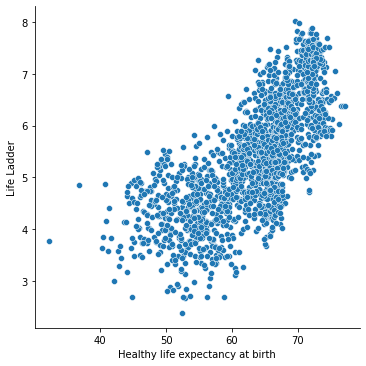

In [154]:
ax = sns.relplot(x="Healthy life expectancy at birth", y="Life Ladder", data=wh,  kind="scatter")

In [25]:
from sklearn.datasets import load_iris


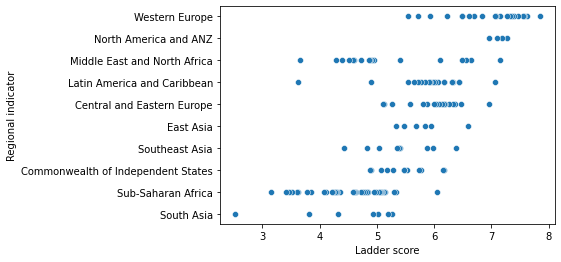

In [56]:
fg = sns.scatterplot(x="Ladder score", y="Regional indicator", data=wh2021,
            )

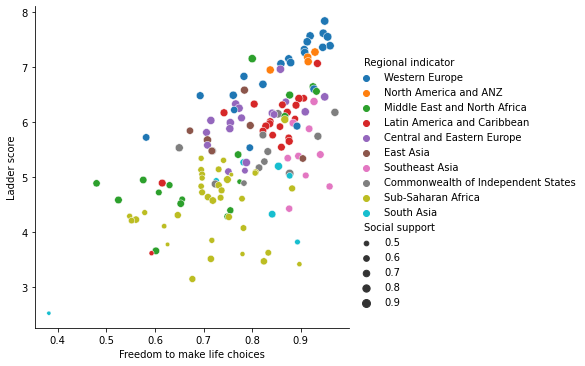

In [115]:
fg = sns.relplot(x="Freedom to make life choices", y="Ladder score", data=wh2021, kind="scatter", size="Social support", hue = "Regional indicator")

In [62]:
from sklearn import preprocessing


[(0.0, 10.0)]

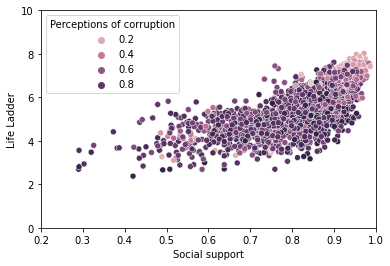

In [126]:
SN= sns.scatterplot("Social support", "Life Ladder", hue="Perceptions of corruption", data=wh)
SN. set(xlim=(0.2,1))
SN. set(ylim=(0, 10))

In [59]:
wh.loc[wh['Life Ladder'] == 2.3750000]

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
11,Afghanistan,2019,2.375,7.697,0.42,52.4,0.394,-0.108,0.924,0.351,0.502


In [60]:
wh.loc[wh['Life Ladder'] == 8.019000]

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
449,Denmark,2005,8.019,10.851,0.972,69.6,0.971,NaN,0.237,0.86,0.154


In [80]:
whWE = wh2021[wh2021['Regional indicator'] == 'Western Europe'] = 6.914905
whNA = wh2021[wh2021['Regional indicator'] == 'North America and ANZ'] = 7.128500
whME = wh2021[wh2021['Regional indicator'] == 'Middle East and North Africa'] = 5.219765
whLA = wh2021[wh2021['Regional indicator'] == 'Latin America and Caribbean'] = 5.908050
whCE = wh2021[wh2021['Regional indicator'] == 'Central and Eastern Europe'] = 5.984765
whEA = wh2021[wh2021['Regional indicator'] == 'East Asia'] = 5.810333
whSE = wh2021[wh2021['Regional indicator'] == 'Southeast Asia'] = 5.407556
whCI = wh2021[wh2021['Regional indicator'] == 'Commonwealth of Independent States'] = 5.467000
whSS = wh2021[wh2021['Regional indicator'] == 'Sub-Saharan Africa'] = 4.494472
whSA = wh2021[wh2021['Regional indicator'] == 'South Asia'] = 4.441857


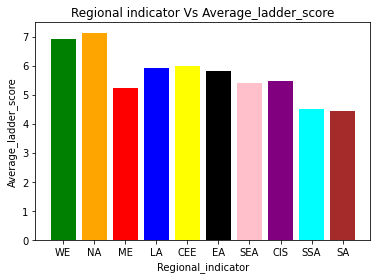

In [102]:
Regional_indicator = ['WE','NA', 'ME', 'LA', 'CEE', 'EA', 'SEA' , 'CIS' , 'SSA' , 'SA']
Average_ladder_score = [6.914905, 7.128500, 5.219765, 5.908050, 5.984765, 5.810333, 5.407556, 5.467000, 4.494472, 4.441857]
c= ["green", "orange", "red", "blue", "yellow","black", "pink", "purple", "cyan", "brown"]
plt.bar(Regional_indicator,Average_ladder_score,color=c)
plt.title('Regional indicator Vs Average_ladder_score')
plt.xlabel('Regional_indicator')
plt.ylabel('Average_ladder_score')
plt.show()



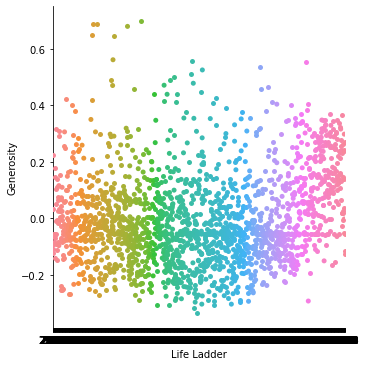

In [110]:
sns.catplot('Life Ladder', 'Generosity', data=wh)

<AxesSubplot:xlabel='Life Ladder', ylabel='Log GDP per capita'>

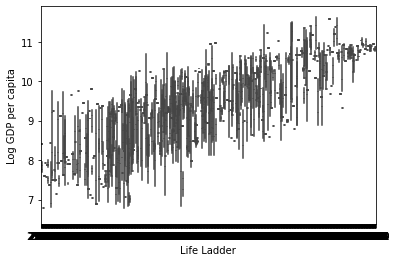

In [113]:
sns.boxplot('Life Ladder', 'Log GDP per capita', data=wh)

<AxesSubplot:>

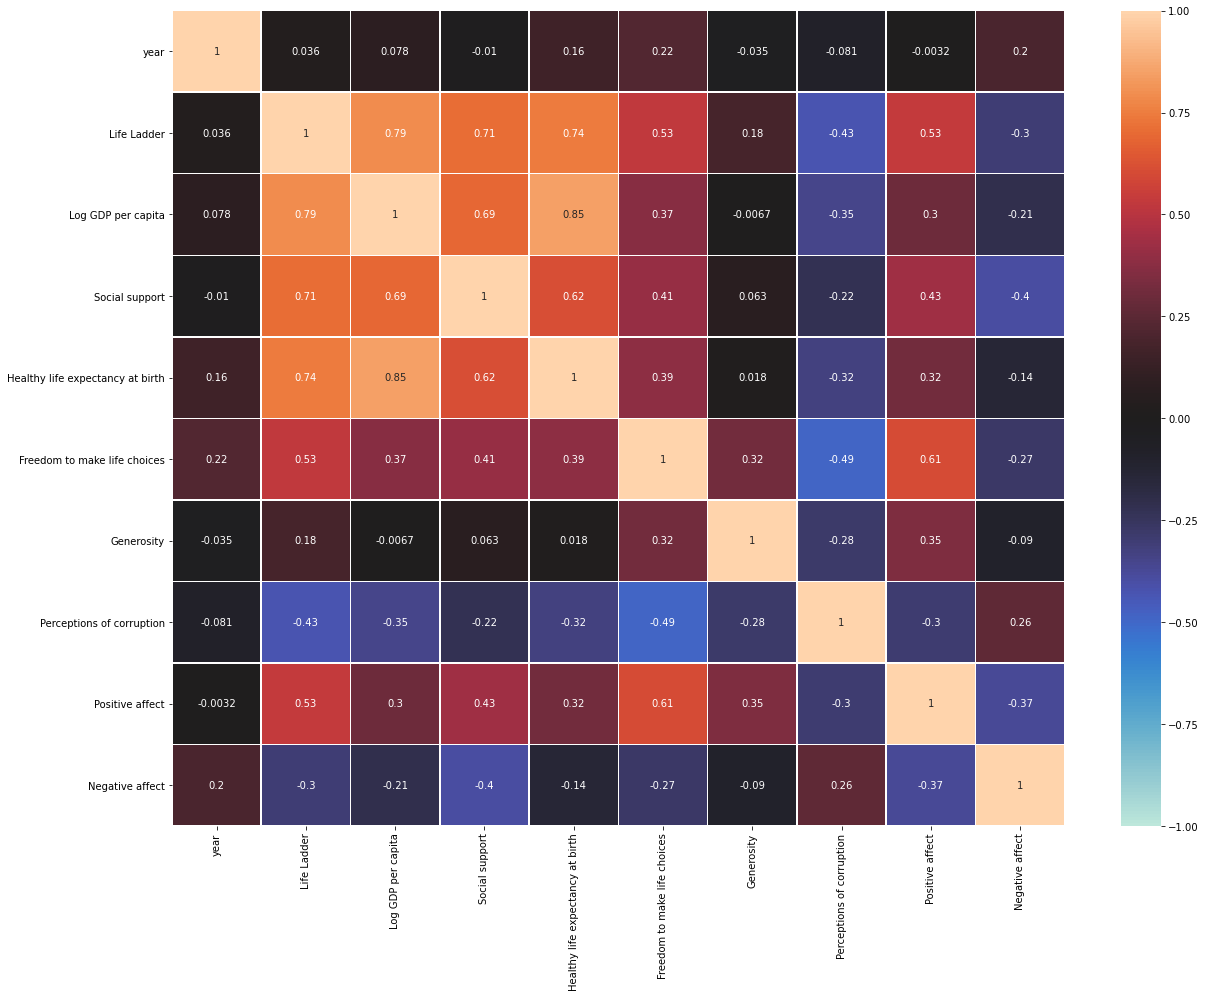

In [114]:
corr = wh.corr()
fig, ax = plt.subplots(figsize=(20,15)) # 
sns.heatmap(corr, 
            annot=True, 
            xticklabels=corr.columns, 
            yticklabels=corr.columns, 
            ax=ax, 
            linewidths=.5, 
            vmin = -1, vmax=1, center=0
           )